In [58]:
import pandas as pd
import numpy as np

In [59]:
diabetic_data=pd.read_csv("diabetic_data.csv")
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**Nettoyage du dataset et préparation des données**

In [60]:
# Remplacer tous les '?' par NaN dans le DataFrame
diabetic_data.replace('?', np.nan, inplace=True)

In [61]:
#état initial du dataset
diabetic_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [62]:
#on fitre sur les colonnes qui contiennent moins de 50000 données manquantes
moins_de_50_mille=diabetic_data.isna().sum()[(diabetic_data.isna().sum() < 50000) & (diabetic_data.isna().sum()>0)]
#on les supprime
diabetic_data = diabetic_data.dropna(subset=moins_de_50_mille.index)
# on remplace les intervalles de la colonne age par par la moyenne en integer
age_mapping = {'[70-80)': 75, '[60-70)': 65, '[50-60)': 55, '[80-90)': 85, '[40-50)': 45, '[30-40)': 35, '[90-100)': 95, '[20-30)': 25, '[10-20)': 15, '[0-10)': 5}

diabetic_data['age'] = diabetic_data['age'].replace(age_mapping)

#on remplace les intervalles de la colonne weight par des nombres
weight_mapping = {'[75-100)': (75+100)//2, '[50-75)': (50+75)//2, '[100-125)': (100 + 125) // 2, '[125-150)': (125 + 150) // 2, '[25-50)': (25 + 50) // 2, '[0-25)': (0 + 25) // 2, '[150-175)': (150 + 175) // 2, '[175-200)': (175 + 200) // 2}

diabetic_data['weight'] = diabetic_data['weight'].replace(weight_mapping)

# Convertir les valeurs de la colonne 'weight' en nombres
diabetic_data['weight'] = pd.to_numeric(diabetic_data['weight'], errors='coerce')

# Remplacer les valeurs manquantes par la moyenne
diabetic_data['weight'].fillna(diabetic_data['weight'].mean(), inplace=True)
diabetic_data=diabetic_data.drop(['max_glu_serum','A1Cresult'],axis=1)


C:\Users\Nadia\AppData\Local\Temp\ipykernel_16820\2889606732.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_data['age'] = diabetic_data['age'].replace(age_mapping)
C:\Users\Nadia\AppData\Local\Temp\ipykernel_16820\2889606732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_data['weight'] = diabetic_data['weight'].replace(weight_mapping)
C:\Users\Nadia\AppData\Local\Temp\ipykernel_16820\2889606732.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [63]:
#le dataset est complètement nettoyé !
diabetic_data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [64]:
print(f'Le dataset nettoyé contient maintenant {diabetic_data.shape[0]} lignes et {diabetic_data.shape[1]} colonnes, soit {(round((diabetic_data.shape[0]*diabetic_data.shape[1])/(101766*50)*100))} % du dataset initial.')
print("Ce résultat est du à des données qu'il m'était impossible de prédir avec les données présentes ou trop de données manquantes comme la race du patient, la spécialité du médecin, le code de paiement, max_glu_serum, A1Cresult etc.")

Le dataset nettoyé contient maintenant 26755 lignes et 48 colonnes, soit 25 % du dataset initial.
Ce résultat est du à des données qu'il m'était impossible de prédir avec les données présentes ou trop de données manquantes comme la race du patient, la spécialité du médecin, le code de paiement, max_glu_serum, A1Cresult etc.


In [65]:
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,87.623202,1,22,7,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,87.623202,2,1,1,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,87.623202,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,87.623202,1,2,7,10,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,87.623202,1,3,6,12,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75,87.623202,2,6,7,6,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85,87.623202,1,13,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75,87.623202,1,22,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75,87.623202,3,6,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [66]:
categorical_data = diabetic_data.select_dtypes(include=['object'])
numerical_data = diabetic_data.select_dtypes(include=['int64','float64'])
categorical_data

,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,Caucasian,Female,MC,Orthopedics-Reconstructive,821,276,285,No,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
20737,Caucasian,Female,MC,Nephrology,V56,403,599,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO
20824,Caucasian,Female,MC,Emergency/Trauma,532,428,535,No,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,MC,InternalMedicine,682,427,276,Steady,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
23879,Caucasian,Female,UN,InternalMedicine,238,250.02,733,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,MC,Emergency/Trauma,575,577,250,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101743,Caucasian,Male,MC,Emergency/Trauma,486,276,428,No,No,No,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101747,Caucasian,Female,MC,InternalMedicine,410,311,250,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,>30
101749,Caucasian,Female,MC,Orthopedics,715,401,250,Steady,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [67]:
IDS_mapping=pd.read_csv('IDS_mapping.csv')
IDS_mapping = dict(zip(IDS_mapping['admission_type_id'], IDS_mapping['description']))
print(IDS_mapping)

{'1': ' Physician Referral', '2': 'Clinic Referral', '3': 'HMO Referral', '4': 'Transfer from a hospital', '5': ' Transfer from a Skilled Nursing Facility (SNF)', '6': ' Transfer from another health care facility', '7': ' Emergency Room', '8': ' Court/Law Enforcement', nan: nan, 'discharge_disposition_id': 'description', '9': ' Not Available', '10': ' Transfer from critial access hospital', '11': 'Normal Delivery', '12': ' Premature Delivery', '13': ' Sick Baby', '14': ' Extramural Birth', '15': 'Not Available', '16': 'Discharged/transferred/referred another institution for outpatient services', '17': nan, '18': ' Transfer From Another Home Health Agency', '19': 'Readmission to Same Home Health Agency', '20': ' Not Mapped', '21': 'Unknown/Invalid', '22': ' Transfer from hospital inpt/same fac reslt in a sep claim', '23': ' Born inside this hospital', '24': ' Born outside this hospital', '25': ' Transfer from Ambulatory Surgery Center', '26': 'Transfer from Hospice', '30': 'Discharged/t

**Visualisations**

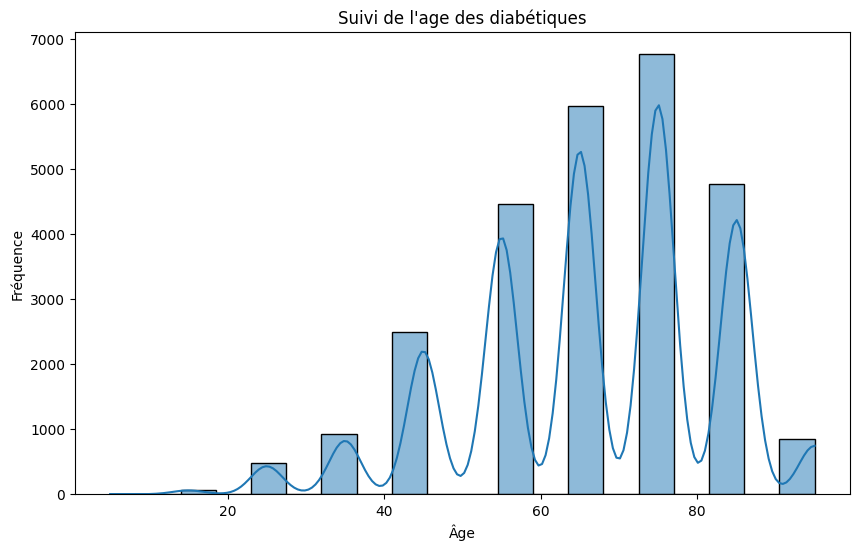

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(diabetic_data['age'], bins=20, kde=True)
plt.title("Suivi de l'age des diabétiques")
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


C:\Users\Nadia\AppData\Local\Temp\ipykernel_16820\1228425312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='gender', data=diabetic_data, palette='husl')


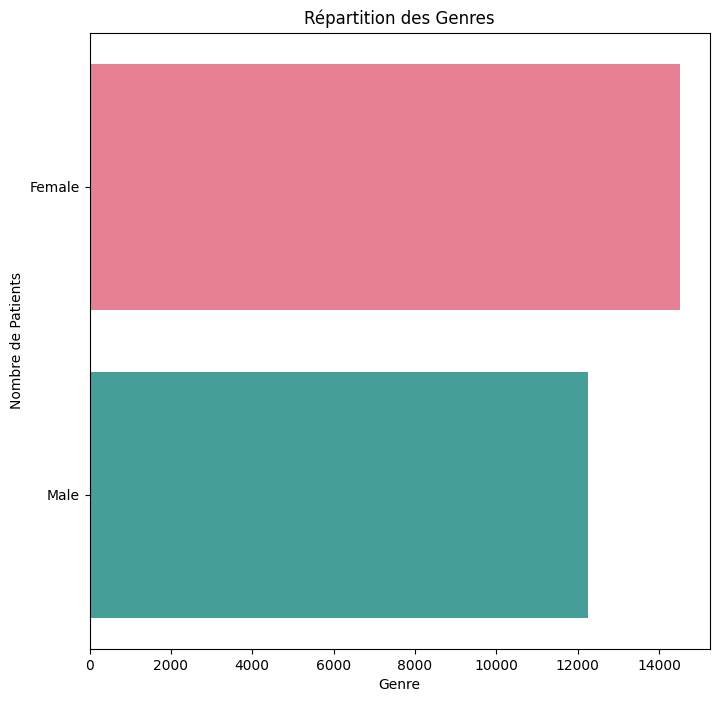

In [69]:
plt.figure(figsize=(8, 8))
sns.countplot(y='gender', data=diabetic_data, palette='husl')
plt.title('Répartition des Genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de Patients')
plt.show()


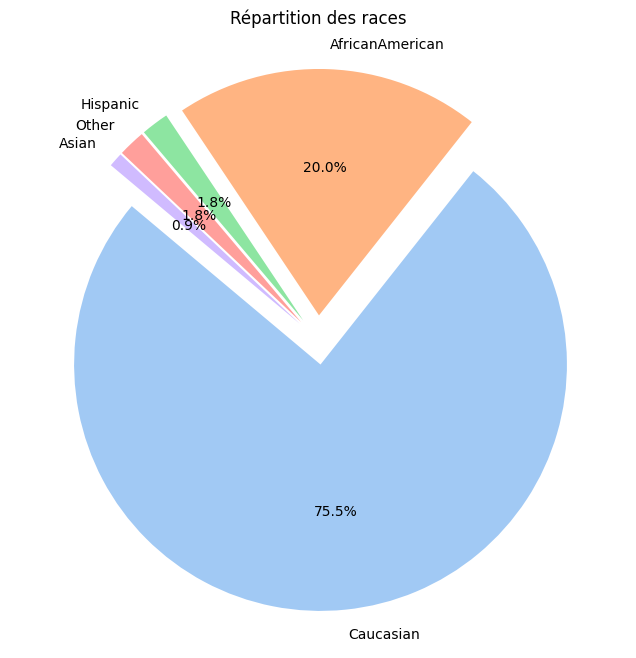

In [70]:
race_counts = diabetic_data['race'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(race_counts)]
labels = race_counts.index
explode = [0.1]* len(race_counts)   # on sépare légèrement chaque tranche pour les mettre en évidence

plt.pie(race_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Répartition des races')
plt.show()

Modélisation

In [71]:
#encodage des variables catégorielles --> on choisit l'encodage ordinal

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform="pandas")
data_encoded = encoder.fit_transform(categorical_data)
data_encoded


,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,2.0,0.0,6.0,25.0,475.0,101.0,116.0,1.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
20737,2.0,0.0,6.0,17.0,563.0,194.0,330.0,1.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
20824,2.0,0.0,6.0,6.0,304.0,212.0,285.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
21083,2.0,1.0,6.0,16.0,397.0,211.0,107.0,2.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
23879,2.0,0.0,14.0,16.0,68.0,58.0,406.0,1.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,2.0,1.0,6.0,6.0,334.0,313.0,64.0,1.0,1.0,1.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
101743,2.0,1.0,6.0,6.0,271.0,101.0,214.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
101747,2.0,0.0,6.0,16.0,210.0,134.0,64.0,1.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
101749,2.0,0.0,6.0,24.0,416.0,192.0,64.0,2.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [72]:
diabetic_data_enc = pd.concat([numerical_data, data_encoded], axis=1)
diabetic_data_enc

,encounter_id,patient_nbr,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,72091308,20123568,75,87.623202,1,22,7,7,58,2,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
20737,72848634,20377854,65,87.623202,2,1,1,3,59,3,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
20824,73062156,20408121,95,87.623202,1,1,7,4,56,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
21083,73731852,20542797,75,87.623202,1,2,7,10,68,1,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
23879,81355914,7239654,75,87.623202,1,3,6,12,77,5,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,75,87.623202,2,6,7,6,46,5,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
101743,443793668,47293812,85,87.623202,1,13,7,3,45,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
101747,443804570,33230016,75,87.623202,1,22,7,8,51,6,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
101749,443816024,106392411,75,87.623202,3,6,1,3,27,1,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [73]:
target_name = "readmitted"
Y = diabetic_data_enc[target_name]
pd.DataFrame(Y).head()

,readmitted
20446,2.0
20737,2.0
20824,2.0
21083,2.0
23879,2.0


In [74]:
X = diabetic_data_enc.drop(columns=[target_name]) #on enlève juste la colonne readmitted du dataset, il ne nous reste que les données à partir desquelles on va prédire class
X.head()

,encounter_id,patient_nbr,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
20446,72091308,20123568,75,87.623202,1,22,7,7,58,2,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20737,72848634,20377854,65,87.623202,2,1,1,3,59,3,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
20824,73062156,20408121,95,87.623202,1,1,7,4,56,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
21083,73731852,20542797,75,87.623202,1,2,7,10,68,1,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23879,81355914,7239654,75,87.623202,1,3,6,12,77,5,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [75]:
#division en données d'entrainement et de test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [76]:
#standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Modèles d'entrainements**

1 - RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
#rf = RandomForestClassifier()
#param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
#grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
#grid_search_rf.fit(x_train_scaled, y_train)

# on affiches les meilleurs hyperparamètres
#best_params_rf = grid_search_rf.best_params_
#print(best_params_rf)

In [78]:
# on entraîne le RandomForest sur ces hyperparamètres
best_rf_model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators= 200)
best_rf_model.fit(x_train_scaled, y_train)

# Predictions
y_pred_rf = best_rf_model.predict(x_test_scaled)

In [79]:
# evaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Le RF permet d'obtenir ", np.round(accuracy_rf*100,2)," % de valeurs justes par rapport aux données réelles")

Le RF permet d'obtenir  61.8  % de valeurs justes par rapport aux données réelles


2 - SVM

In [80]:
from sklearn.svm import SVC

#svm= SVC()
#param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
#grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
#grid_search_svm.fit(x_train_scaled, y_train)

# on affiche les meilleurs hyperparamètres
#best_params_svm = grid_search_svm.best_params_
#print(best_params_svm)

Après plus de 3h à tourner, l'algo n'a pas pu déterminer les meilleurs paramètres pour le SVM. Je l'ai donc fait à la main en comparant les scores pour plusieurs combinaisons de paramètres. Les paramètres qui donnent le meilleurs score sont: **C=1, kernel='rbf', gamma=0.01**

In [81]:
# on entraîne le SVC avec ces hyperparamètres
best_svm_model = SVC(C=1, kernel='rbf', gamma=0.01)
best_svm_model.fit(x_train_scaled, y_train)

# Predictions
y_pred_svm = best_svm_model.predict(x_test_scaled)

# évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Le SVM permet d'obtenir ", np.round(accuracy_svm*100,2)," % de valeurs justes par rapport aux données réelles")

Le SVM permet d'obtenir  60.03  % de valeurs justes par rapport aux données réelles


3 - KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier()
#param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
#grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
#grid_search_knn.fit(x_train_scaled, y_train)

#best_params_knn = grid_search_knn.best_params_
#print(best_params_knn)

In [83]:
#enttraînement du modèle
best_knn_model = KNeighborsClassifier(n_neighbors= 7, weights= 'distance')
best_knn_model.fit(x_train_scaled, y_train)

# Predictions
y_pred_knn = best_knn_model.predict(x_test_scaled)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Le KNN permet d'obtenir ", np.round(accuracy_knn*100,2)," % de valeurs justes par rapport aux données réelles")

Le KNN permet d'obtenir  55.69  % de valeurs justes par rapport aux données réelles


4 - DecisionTree

In [84]:
from sklearn.tree import DecisionTreeClassifier

#decision_tree = DecisionTreeClassifier()
#param_grid_dt = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy')
#grid_search_dt.fit(x_train_scaled, y_train)

# on affiche les meilleurs hyperparamètres
#best_params_dt = grid_search_dt.best_params_
#print(best_params_dt)


In [85]:
best_dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 2, min_samples_split= 2)
best_dt_model.fit(x_train_scaled, y_train)

# Predictions
y_pred_dt = best_dt_model.predict(x_test_scaled)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Le Decision Tree permet d'obtenir ", np.round(accuracy_dt*100,2)," % de valeurs justes par rapport aux données réelles")

Le Decision Tree permet d'obtenir  60.25  % de valeurs justes par rapport aux données réelles


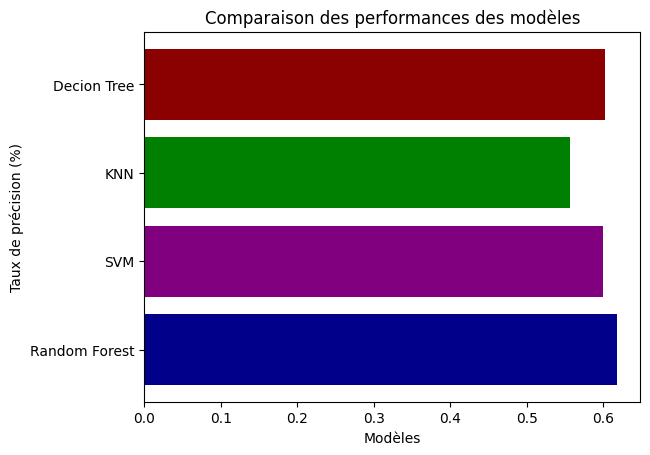

In [86]:
# Créer un graphique à barres
algorithms = ['Random Forest', 'SVM', 'KNN','Decion Tree']
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_dt]

plt.barh(algorithms, accuracies, color=['darkblue','purple','green','darkred'])
plt.xlabel('Modèles')
plt.ylabel('Taux de précision (%)')
plt.title('Comparaison des performances des modèles')
plt.show()